In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load all MLB stats from 1962-2014
base = pd.read_csv('data/baseball.csv')
base.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [3]:
# Pick out the data from after Moneyball was implemented
dpyears = base[base.Year > 2002]
dpyears.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


The prediction is that 95 wins in a season will qualify the  team for playoffs

In [4]:
# Show team wins and playoff appearances
qualifiedwins = dpyears[['Team', 'Year', 'W', 'Playoffs']]
qualifiedwins

,Team,Year,W,Playoffs
0,ARI,2012,81,0
1,ATL,2012,94,1
2,BAL,2012,93,1
3,BOS,2012,69,0
4,CHC,2012,61,0
...,...,...,...,...
295,SFG,2003,100,1
296,STL,2003,85,0
297,TBD,2003,63,0
298,TEX,2003,71,0


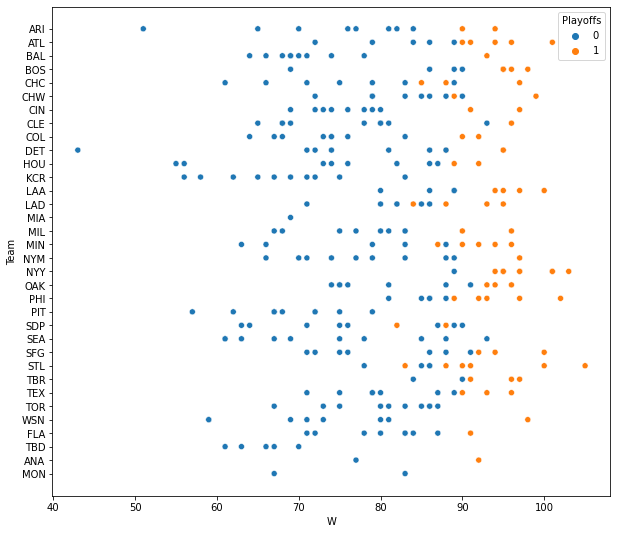

In [5]:
# Plot team wins and playoff appearances
plt.figure(figsize=(10,9))
ax = sns.scatterplot(x="W", y="Team", hue="Playoffs",data=qualifiedwins)
plt.plot(95, 0, color='r')

95 Wins will typically guaruntee a playoff spot!

What run differential is needed to win 95 games?

A 135 run differential is predicted to get 95 wins

In [6]:
# Create Run Differential data
dpyears['RD'] = dpyears['RS'] - dpyears['RA']
dpyears.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Team          300 non-null    object 
 1   League        300 non-null    object 
 2   Year          300 non-null    int64  
 3   RS            300 non-null    int64  
 4   RA            300 non-null    int64  
 5   W             300 non-null    int64  
 6   OBP           300 non-null    float64
 7   SLG           300 non-null    float64
 8   BA            300 non-null    float64
 9   Playoffs      300 non-null    int64  
 10  RankSeason    82 non-null     float64
 11  RankPlayoffs  82 non-null     float64
 12  G             300 non-null    int64  
 13  OOBP          300 non-null    float64
 14  OSLG          300 non-null    float64
 15  RD            300 non-null    int64  
dtypes: float64(7), int64(7), object(2)
memory usage: 39.8+ KB


<ipython-input-6-b393a75d7609>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dpyears['RD'] = dpyears['RS'] - dpyears['RA']


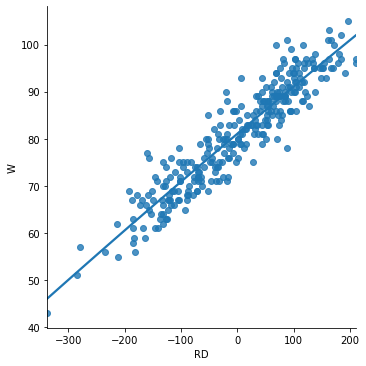

In [7]:
# Show the relationship between Wins and Run Differential
sns.lmplot(x ="RD", y ="W", data = dpyears, order = 2, ci = None)

The plot shows the 135 run differential might be true, but let's test it.

In [8]:
# Create a ML Linear Regression
from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

X = np.array(dpyears['RD']).reshape(-1, 1) 
y = np.array(dpyears['W']).reshape(-1, 1) 
  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 
  
# Splitting the data into training and testing data 
regr = LinearRegression() 
  
m = regr.fit(X_train, y_train)
m.get_params()

print(regr.score(X_test, y_test))

regr.predict(np.array(133).reshape(-1, 1))

import statsmodels.formula.api as smf
smf.ols(formula ='W ~ RD', data = dpyears).fit().summary()

0.8550888980933034


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     2010.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          1.74e-134
Time:                        14:01:40   Log-Likelihood:                -845.42
No. Observations:                 300   AIC:                             1695.
Df Residuals:                     298   BIC:                             1702.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     80.9800      0.235    345.021      0.000      80.518      81.442
RD             0.1013      0.002     44.829      0.000       0.097       0.106
==============================================================================
Omnibus:                        8.134   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.030
Skew:                           0.390   Prob(JB):                       0.0180
Kurtosis:                       3.183   Cond. No.                         104.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Wins = 80.9800 + 0.1013*RD

So if 95 wins is the target,

RD = (95 - 80.9800)/0.1013 = 138

Based on original moneyball predictions, we need a 138 run differential in order to get 95 wins and make the playoffs.



On Base Percentage and Slugging are the most important factors for predicting runs scored

In [9]:
# ML used in predicting Runs Scored
smf.ols(formula = 'RS ~ OBP + SLG', data = dpyears).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RS   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     1639.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          3.42e-161
Time:                        14:01:59   Log-Likelihood:                -1362.7
No. Observations:                 300   AIC:                             2731.
Df Residuals:                     297   BIC:                             2743.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -850.6026     33.178    -25.637      0.000    -915.897    -785.308
OBP         2589.8799    152.118     17.025      0.000    2290.515    2889.245
SLG         1781.9587     78.482     22.705      0.000    1627.508    1936.409
==============================================================================
Omnibus:                        3.305   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                3.230
Skew:                           0.149   Prob(JB):                        0.199
Kurtosis:                       3.411   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now for Runs Allowed

In [10]:
# ML used in predicting Runs Allowed
smf.ols(formula ='RA ~ OOBP + OSLG', data = dpyears).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RA   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     1216.
Date:                Thu, 02 Dec 2021   Prob (F-statistic):          8.87e-144
Time:                        14:02:28   Log-Likelihood:                -1418.4
No. Observations:                 300   AIC:                             2843.
Df Residuals:                     297   BIC:                             2854.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -868.8136     37.084    -23.428      0.000    -941.795    -795.832
OOBP        2897.5694    193.526     14.973      0.000    2516.714    3278.425
OSLG        1582.2681    109.292     14.477      0.000    1367.183    1797.353
==============================================================================
Omnibus:                        2.000   Durbin-Watson:                   2.144
Prob(Omnibus):                  0.368   Jarque-Bera (JB):                1.752
Skew:                           0.068   Prob(JB):                        0.416
Kurtosis:                       2.651   Cond. No.                         154.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

RS = -850.6026 + 2589.9799(OBP) + 1781.9587(SLG)

RA = -868.8136 + 2897.5694(OOBP) + 1582.2681(OSLG)



Now let's see how close this is with the Astros 2021 stats

In [11]:
# Load 2021 MLB team statistics CSV
teams = pd.read_csv('data/team_stats_2021.csv')
teams.head()

,Team,#Bat,R/G,G,W,L,R,RA,RD,BA,OBP,SLG,OPS,OPS+,OOBP,OSLG
0,Arizona Diamondbacks,64,4.19,162,52,110,679,893,-214,0.236,0.309,0.382,0.692,87,0.339,0.468
1,Atlanta Braves,56,4.91,161,88,73,790,656,134,0.244,0.319,0.435,0.754,96,0.308,0.387
2,Baltimore Orioles,44,4.07,162,52,110,659,956,-297,0.239,0.304,0.402,0.705,90,0.344,0.473
3,Boston Red Sox,43,5.12,162,92,70,829,749,80,0.261,0.328,0.449,0.777,104,0.329,0.418
4,Chicago Cubs,69,4.35,162,71,91,705,839,-134,0.237,0.312,0.407,0.719,93,0.337,0.442


In [12]:
# Get Astros 2021 stats to plug into formula
obps = teams[teams.Team == 'Houston Astros'][['Team', 'OBP', 'SLG', 'OOBP', 'OSLG', 'R', 'RA', 'RD', 'W']]
obps

,Team,OBP,SLG,OOBP,OSLG,R,RA,RD,W
10,Houston Astros,0.339,0.444,0.307,0.385,863,658,205,95


Based on these calculations, the Astros 2021 Runs Scored and Runs Allowed should have been as follows:

RS = 819

RA = 630

Giving us a Run Differential of 189, which is much higher than the predicted amount needed and lower than the actual amount in the 2021 season.

This shows how a little bit of luck factors into games because we exceeded the predicted Run Differential and still only got 95 wins.

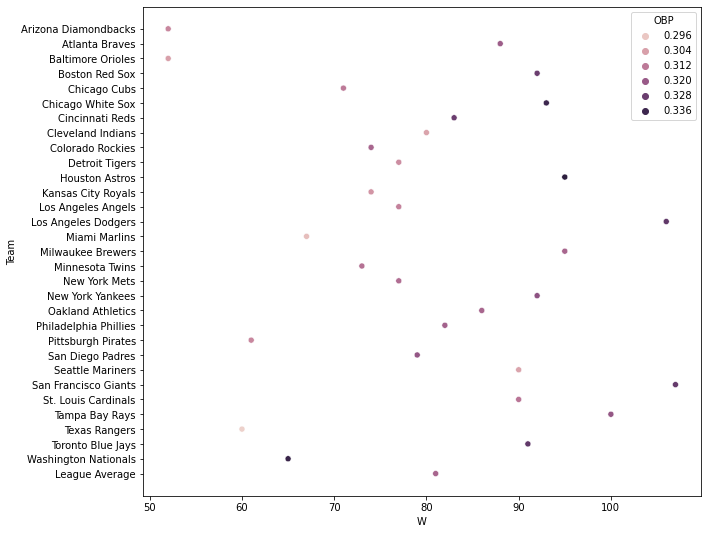

In [13]:
# Show a correlation between 2021 MLB Wins and OBP
plt.figure(figsize = (10, 9))
ax = sns.scatterplot(x = 'W', y = 'Team', hue = 'OBP', data = teams)
plt.plot(95, 0, color = 'r')

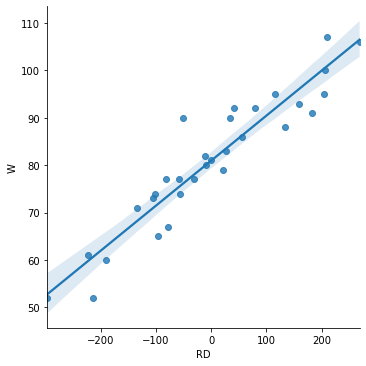

In [14]:
# Show a relationship between 2021 MLB Wins and Run Differential
sns.lmplot(x = 'RD', y = 'W', data = teams)

In [15]:
# Display all of the Astros offensive stats from 2021
teams.loc[10]

Team    Houston Astros
#Bat                42
R/G               5.33
G                  162
W                   95
L                   67
R                  863
RA                 658
RD                 205
BA               0.267
OBP              0.339
SLG              0.444
OPS              0.783
OPS+               113
OOBP             0.307
OSLG             0.385
Name: 10, dtype: object

Now we neeed to determine possible replacements for SS Carlos Correa and CF Jake Meyers.

We wil find their average OBP and SLG.

In [16]:
# Load 2021 player stats CSV
players = pd.read_csv('data/player_stats_2021.csv')
players.head()

,Name,Age,Tm,Lg,G,PA,AB,R,H,BA,OBP,SLG,OPS,OPS+,POS
0,Fernando�Abad*,35,BAL,AL,2,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1
1,Cory�Abbott,25,CHC,NL,8,3,3,0,1,0.333,0.333,0.333,0.667,81.0,/1H
2,Albert�Abreu,25,NYY,AL,3,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1
3,Bryan�Abreu,24,HOU,AL,1,0,0,0,0,NaN,NaN,NaN,NaN,NaN,1
4,Jos�Abreu,34,CHW,AL,152,659,566,86,148,0.261,0.351,0.481,0.831,125.0,*3D/5


In [17]:
# Display Carlos Correa's 2021 stats
players.loc[308]

Name    Carlos�Correa
Age                26
Tm                HOU
Lg                 AL
G                 148
PA                640
AB                555
R                 104
H                 155
BA              0.279
OBP             0.366
SLG             0.485
OPS              0.85
OPS+            131.0
POS                *6
Name: 308, dtype: object

In [18]:
# Display Jake Meyers' 2021 stats
players.loc[998]

Name    Jake�Meyers
Age              25
Tm              HOU
Lg               AL
G                49
PA              163
AB              146
R                22
H                38
BA             0.26
OBP           0.323
SLG           0.438
OPS           0.761
OPS+          107.0
POS          8/H79D
Name: 998, dtype: object

Correa and Meyers combind OBP = .366 + .323 = .689

Correa and Meyers combind SLG = .485 + .438 = .923


Combined OBP/2 = .345

Combined SLG/2 = .462


We need 2 players with at least a .345 OBP and .462 SLG

In [27]:
# Drop any rows that contain null values in OBP or SLG
players2 = players.dropna(subset = ['OBP', 'SLG'])

# Drop rows that have an OBP > .0345
players3 = players2[(players2['OBP'] > 0.345)]
players3

,Name,Age,Tm,Lg,G,PA,AB,R,H,BA,OBP,SLG,OPS,OPS+,POS
4,Jos�Abreu,34,CHW,AL,152,659,566,86,148,0.261,0.351,0.481,0.831,125.0,*3D/5
5,Ronald�Acuna�Jr.,23,ATL,NL,82,360,297,72,84,0.283,0.394,0.596,0.990,155.0,9/8H
9,Willy�Adames,25,MIL,NL,99,413,365,61,104,0.285,0.366,0.521,0.886,135.0,6/DH
12,Riley�Adams,25,TOT,MLB,47,120,99,13,22,0.222,0.358,0.384,0.742,105.0,2H
14,Riley�Adams,25,WSN,NL,35,90,71,11,19,0.268,0.422,0.465,0.887,145.0,2H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1634,Garrett�Whitlock,25,BOS,AL,4,2,2,0,1,0.500,0.500,0.500,1.000,168.0,1
1658,Jesse�Winker*,27,CIN,NL,110,485,423,77,129,0.305,0.394,0.556,0.949,140.0,7/DH98
1666,Connor�Wong,25,BOS,AL,6,14,13,3,4,0.308,0.357,0.538,0.896,134.0,/2HD
1678,Jordan�Yamamoto,25,NYM,NL,2,2,2,0,1,0.500,0.500,0.500,1.000,178.0,/1


In [28]:
# Drop rows that have a SLG > 0.462
players4 = players3[(players3['SLG'] > 0.462)]
players4

,Name,Age,Tm,Lg,G,PA,AB,R,H,BA,OBP,SLG,OPS,OPS+,POS
4,Jos�Abreu,34,CHW,AL,152,659,566,86,148,0.261,0.351,0.481,0.831,125.0,*3D/5
5,Ronald�Acuna�Jr.,23,ATL,NL,82,360,297,72,84,0.283,0.394,0.596,0.990,155.0,9/8H
9,Willy�Adames,25,MIL,NL,99,413,365,61,104,0.285,0.366,0.521,0.886,135.0,6/DH
14,Riley�Adams,25,WSN,NL,35,90,71,11,19,0.268,0.422,0.465,0.887,145.0,2H
42,Jose�Altuve,31,HOU,AL,146,678,601,117,167,0.278,0.350,0.489,0.839,127.0,*4/HD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,Joey�Votto*,37,CIN,NL,129,533,448,73,119,0.266,0.375,0.563,0.938,136.0,*3/DH
1634,Garrett�Whitlock,25,BOS,AL,4,2,2,0,1,0.500,0.500,0.500,1.000,168.0,1
1658,Jesse�Winker*,27,CIN,NL,110,485,423,77,129,0.305,0.394,0.556,0.949,140.0,7/DH98
1666,Connor�Wong,25,BOS,AL,6,14,13,3,4,0.308,0.357,0.538,0.896,134.0,/2HD


In [41]:
# Drop players that had less than 30 games played
players5 = players4[(players4['G'] > 30)]
players5

,Name,Age,Tm,Lg,G,PA,AB,R,H,BA,OBP,SLG,OPS,OPS+,POS
4,Jos�Abreu,34,CHW,AL,152,659,566,86,148,0.261,0.351,0.481,0.831,125.0,*3D/5
5,Ronald�Acuna�Jr.,23,ATL,NL,82,360,297,72,84,0.283,0.394,0.596,0.990,155.0,9/8H
9,Willy�Adames,25,MIL,NL,99,413,365,61,104,0.285,0.366,0.521,0.886,135.0,6/DH
14,Riley�Adams,25,WSN,NL,35,90,71,11,19,0.268,0.422,0.465,0.887,145.0,2H
42,Jose�Altuve,31,HOU,AL,146,678,601,117,167,0.278,0.350,0.489,0.839,127.0,*4/HD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1552,Trea�Turner,28,LAD,NL,52,226,207,41,70,0.338,0.385,0.565,0.950,152.0,4/6H
1584,Matt�Vierling,24,PHI,NL,34,77,71,11,23,0.324,0.364,0.479,0.843,126.0,H/3879
1593,Austin�Voth,29,WSN,NL,47,3,2,1,1,0.500,0.667,0.500,1.167,230.0,1
1594,Joey�Votto*,37,CIN,NL,129,533,448,73,119,0.266,0.375,0.563,0.938,136.0,*3/DH


In [42]:
# Display options for SS replacement
playeroptions1 = players5[players5.POS.str.contains('6', na = False)]
playeroptions1

,Name,Age,Tm,Lg,G,PA,AB,R,H,BA,OBP,SLG,OPS,OPS+,POS
9,Willy�Adames,25,MIL,NL,99,413,365,61,104,0.285,0.366,0.521,0.886,135.0,6/DH
94,Javier�Baez,28,NYM,NL,47,186,167,32,50,0.299,0.371,0.515,0.886,141.0,46/H
163,Xander�Bogaerts,28,BOS,AL,144,603,529,90,156,0.295,0.370,0.493,0.863,127.0,*6/DH
196,Kris�Bryant,29,TOT,NL,144,586,513,86,136,0.265,0.353,0.481,0.835,124.0,57983/H6
197,Kris�Bryant,29,CHC,NL,93,374,326,58,87,0.267,0.358,0.503,0.861,130.0,57983/H6
308,Carlos�Correa,26,HOU,AL,148,640,555,104,155,0.279,0.366,0.485,0.850,131.0,*6
314,Brandon�Crawford*,34,SFG,NL,138,549,483,79,144,0.298,0.373,0.522,0.895,141.0,*6/H
1367,Corey�Seager*,27,LAD,NL,95,409,353,54,108,0.306,0.394,0.521,0.915,145.0,6/H
1486,Fernando�Tatis�Jr.,22,SDP,NL,130,546,478,99,135,0.282,0.364,0.611,0.975,166.0,69/8HD
1550,Trea�Turner,28,TOT,NL,148,646,595,107,195,0.328,0.375,0.536,0.911,146.0,64/H


In [43]:
# Display options for CF replacement
playeroptions2 = players5[players5.POS.str.contains('9', na = False)]
playeroptions2

,Name,Age,Tm,Lg,G,PA,AB,R,H,BA,OBP,SLG,OPS,OPS+,POS
5,Ronald�Acuna�Jr.,23,ATL,NL,82,360,297,72,84,0.283,0.394,0.596,0.990,155.0,9/8H
131,Josh�Bell#,28,WSN,NL,144,568,498,75,130,0.261,0.347,0.476,0.823,124.0,*3H/7D9
146,Mookie�Betts,28,LAD,NL,122,550,466,93,123,0.264,0.367,0.487,0.854,128.0,*98/4H
196,Kris�Bryant,29,TOT,NL,144,586,513,86,136,0.265,0.353,0.481,0.835,124.0,57983/H6
197,Kris�Bryant,29,CHC,NL,93,374,326,58,87,0.267,0.358,0.503,0.861,130.0,57983/H6
241,Nick�Castellanos,29,CIN,NL,138,585,531,95,164,0.309,0.362,0.576,0.939,136.0,*9/DH
305,Garrett�Cooper,30,MIA,NL,71,250,215,30,61,0.284,0.380,0.465,0.845,129.0,93H/D
512,Joey�Gallo*,27,TEX,AL,95,388,310,57,69,0.223,0.379,0.490,0.869,139.0,9D/H
645,Bryce�Harper*,28,PHI,NL,141,599,488,101,151,0.309,0.429,0.615,1.044,179.0,*9/D3
686,Teoscar�Hernandez,28,TOR,AL,143,595,550,92,163,0.296,0.346,0.524,0.870,133.0,*97D/8H


Based on these results and my knowledge of Free Agency, it is my recommendation to pursue Kris Bryant due to his numbers and versatility.

It would also be smart to pursue Nick Castellanos to play Center Field.